In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Data (2).csv')
data.head()
data.tail()

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.42,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.34,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.75,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim
1627460,2024-12-10,"Zoo Park, Hyderabad - TSPCB",72.83,176.48,NaN,Hyderabad,17.349694,78.451437,Telangana


In [ ]:
aqi=data.copy()
aqi['Timestamp']=pd.to_datetime(aqi['Timestamp'])
aqi.head()

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
State_data = pd.read_csv('State_data.csv')
State_data.head()

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252


In [ ]:
NCAP_Funding = pd.read_csv('NCAP_Funding.csv')
NCAP_Funding.head()

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91


# Spatial aggregation. [4 Marks]
1.Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?


In [ ]:
av_PM2_5 = data.groupby('state')['PM2.5'].mean()
av_PM2_5
max_PM25 = av_PM2_5.idxmax()
print('The state with the highest average PM2.5 concentration is', max_PM25 )


The state with the highest average PM2.5 concentration is Delhi


2.Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data_2023 = data[data['Timestamp'].dt.year == 2023]
high_pm2_5 = data_2023[data_2023['PM2.5'] > 300]
print("The state with most days with hazardous PM2.5 levels is" , high_pm2_5.groupby('state')['PM2.5'].count().idxmax())


The state with most days with hazardous PM2.5 levels is Delhi


3.Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)


In [ ]:
# One way to measure variability in dataset is to meaure the standard deviation of the dataset:
data_2023.groupby('state')['PM2.5'].std()
print("The state with the highest variability in PM2.5 levels is", data_2023.groupby('state')['PM2.5'].std().idxmax())
# Another simple and effective way is to measure the range of PM2.5 values:
print("The state with largest range of PM2.5 values is ",(data_2023.groupby('state')['PM2.5'].max() - data_2023.groupby('state')['PM2.5'].min()).idxmax())

The state with the highest variability in PM2.5 levels is Delhi
The state with largest range of PM2.5 values is  Delhi


4.Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?



In [ ]:
data_20_21 = data[(data['Timestamp'].dt.year >= 2020) & (data['Timestamp'].dt.year <= 2021)]
print("The state with the lowest average PM2.5 levels during the Covid period is", data_20_21.groupby('state')['PM2.5'].mean().idxmin())

The state with the lowest average PM2.5 levels during the Covid period is Mizoram


# Temporal Aggregation [3 Marks]

1.Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.


In [ ]:
data_aug_2020 = data[(data['Timestamp'].dt.year == 2020) & (data['Timestamp'].dt.month == 8)]
data_aug_2020

max_pm25_value = data_aug_2020['PM2.5'].max()
max_pm25_stations = data_aug_2020[data_aug_2020['PM2.5'] == max_pm25_value]['station'].unique()
print("Station with highest PM2.5 in Aug 2020 is :", max_pm25_stations)

Station with highest PM2.5 in Aug 2020 is : ['Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']


2.For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?


In [ ]:
Temporal_Aggregation2_wint=aqi.loc[aqi['station'].isin(['Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']) & ((aqi['Timestamp'].dt.month==12) | (aqi['Timestamp'].dt.month<=2)) & (aqi['Timestamp'].dt.year==2018)]
Temporal_Aggregation2_sum=aqi.loc[aqi['station'].isin(['Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']) & ((aqi['Timestamp'].dt.month>=3) & (aqi['Timestamp'].dt.month<=5)) & (aqi['Timestamp'].dt.year==2018)]
Temporal_Aggregation2_mon=aqi.loc[aqi['station'].isin(['Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']) & ((aqi['Timestamp'].dt.month>=6) & (aqi['Timestamp'].dt.month<=9)) & (aqi['Timestamp'].dt.year==2018)]
Temporal_Aggregation2_wm=Temporal_Aggregation2_wint['PM2.5'].mean()
Temporal_Aggregation2_sm=Temporal_Aggregation2_sum['PM2.5'].mean()
Temporal_Aggregation2_mm=Temporal_Aggregation2_mon['PM2.5'].mean()
Temporal_Aggregation2_sum
print("Winter",Temporal_Aggregation2_wm)
print("Summer",Temporal_Aggregation2_sm)
print("Monsoon",Temporal_Aggregation2_mm)



Winter 67.4923443634478
Summer nan
Monsoon 34.42519611317571


Winter has the highest pollution (67.49 PM2.5) because cold air traps pollutants close to the ground, and increased heating and vehicle emissions add to the problem but during monsoon (34.42 PM2.5) is lower due to rain cleaning the air.

3.Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
Calculate the monthly average PM2.5 for weekdays and weekends separately
X-axis: Months (January to December).
Y-axis: Average PM2.5 levels.
Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.



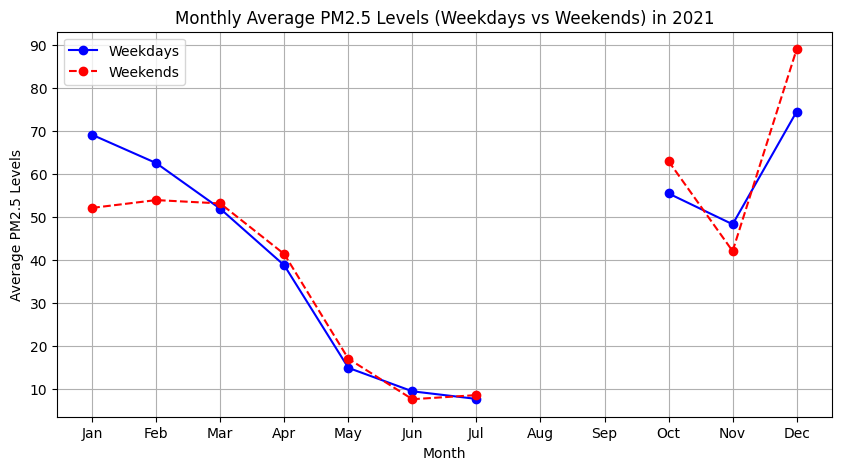

In [ ]:

data['Timestamp'] = pd.to_datetime(data['Timestamp'])

pm_2021 = data[data['Timestamp'].dt.year == 2021]

station_name = 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'

weekends_2021 = pm_2021[pm_2021['Timestamp'].dt.dayofweek >= 5]
weekdays_2021 = pm_2021[pm_2021['Timestamp'].dt.dayofweek < 5]

weekends_kala = weekends_2021[weekends_2021['station'] == station_name]
weekdays_kala = weekdays_2021[weekdays_2021['station'] == station_name]

monthly_avg_weekends = weekends_kala.groupby(weekends_kala['Timestamp'].dt.month)['PM2.5'].mean()
monthly_avg_weekdays = weekdays_kala.groupby(weekdays_kala['Timestamp'].dt.month)['PM2.5'].mean()

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_weekdays.index, monthly_avg_weekdays, marker='o', linestyle='-', color='blue', label="Weekdays")
plt.plot(monthly_avg_weekends.index, monthly_avg_weekends, marker='o', linestyle='--', color='red', label="Weekends")

plt.xlabel("Month")
plt.ylabel("Average PM2.5 Levels")
plt.title("Monthly Average PM2.5 Levels (Weekdays vs Weekends) in 2021")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True)
plt.show()


# Spatio-temporal aggregation [3 marks]
1.For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?


In [ ]:
pm_2022 = data[(data['Timestamp'].dt.year == 2022)]
summer_22 = pm_2022[(pm_2022['Timestamp'].dt.month >= 3) & (pm_2022['Timestamp'].dt.month <= 5)]
monsoon_22 = pm_2022[(pm_2022['Timestamp'].dt.month >= 6) & (pm_2022['Timestamp'].dt.month <= 9)]

pm_monsoon_22 = monsoon_22.groupby('state')['PM2.5'].mean()
pm_summer_22 = summer_22.groupby('state')['PM2.5'].mean()

pm_2022 = data[(data['Timestamp'].dt.year == 2022)]
summer_22 = pm_2022[(pm_2022['Timestamp'].dt.month >= 3) & (pm_2022['Timestamp'].dt.month <= 5)]
monsoon_22 = pm_2022[(pm_2022['Timestamp'].dt.month >= 6) & (pm_2022['Timestamp'].dt.month <= 9)]

pm_monsoon_22 = monsoon_22.groupby('state')['PM2.5'].mean()
pm_summer_22 = summer_22.groupby('state')['PM2.5'].mean()

per_incr = abs((pm_monsoon_22 - pm_summer_22) / pm_summer_22 )*100
per_incr_max = per_incr.idxmax()
print("The state with most  percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May) is ", per_incr_max)

The state with most  percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May) is  Assam


2.Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?


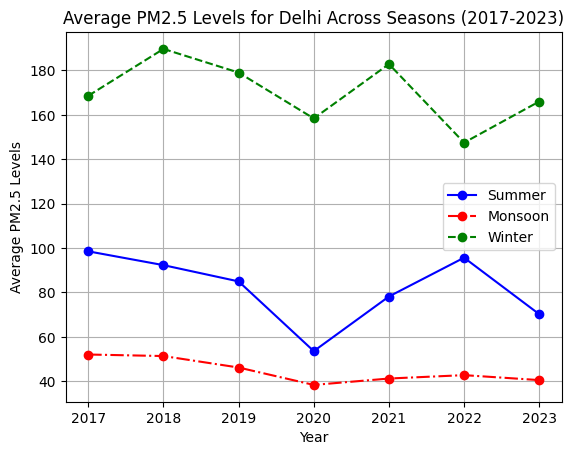

We can observe that during the winters the pollution level is maximum and around 4X more than that during monsoon while summers are more polluted than monsoons but significantly less than winters.


In [ ]:
data_copy1 = data.copy()
data_copy1_filtered = data_copy1[(data_copy1['Timestamp'].dt.year >= 2017) & (data_copy1['Timestamp'].dt.year <= 2023)]
Delhi_data = data_copy1_filtered[data_copy1_filtered['state'] == 'Delhi'].copy()
Delhi_data['Timestamp'] = pd.to_datetime(Delhi_data['Timestamp'], errors='coerce')

delhi_summer = Delhi_data[(Delhi_data['Timestamp'].dt.month >= 3) & (Delhi_data['Timestamp'].dt.month <= 5)]
delhi_monsoon = Delhi_data[(Delhi_data['Timestamp'].dt.month >= 6) & (Delhi_data['Timestamp'].dt.month <= 9)]
delhi_winter = Delhi_data[(Delhi_data['Timestamp'].dt.month == 12) | (Delhi_data['Timestamp'].dt.month <= 2)]

delhi_summer_pm = delhi_summer.groupby(delhi_summer['Timestamp'].dt.year)['PM2.5'].mean()
delhi_monsoon_pm = delhi_monsoon.groupby(delhi_monsoon['Timestamp'].dt.year)['PM2.5'].mean()
delhi_winter_pm = delhi_winter.groupby(delhi_winter['Timestamp'].dt.year)['PM2.5'].mean()

plt.plot(delhi_summer_pm.index, delhi_summer_pm, marker='o', linestyle='-', color='blue', label="Summer")
plt.plot(delhi_monsoon_pm.index, delhi_monsoon_pm, marker='o', linestyle='-.', color='red', label="Monsoon")
plt.plot(delhi_winter_pm.index, delhi_winter_pm, marker='o', linestyle='--', color='green', label="Winter")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels")
plt.title("Average PM2.5 Levels for Delhi Across Seasons (2017-2023)")
plt.grid(True)
plt.show()

print("We can observe that during the winters the pollution level is maximum and around 4X more than that during monsoon while summers are more polluted than monsoons but significantly less than winters.")


3.Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)



The standard deviation of PM2.5 values in Delhi from year 2017 to 2023 is  84.93219895652578
The standard deviation of PM2.5 values in Mumbai from year 2017 to 2023 is  40.184004389169566
So it is pretty clear that Delhi has more fluctuations than Mumbai.


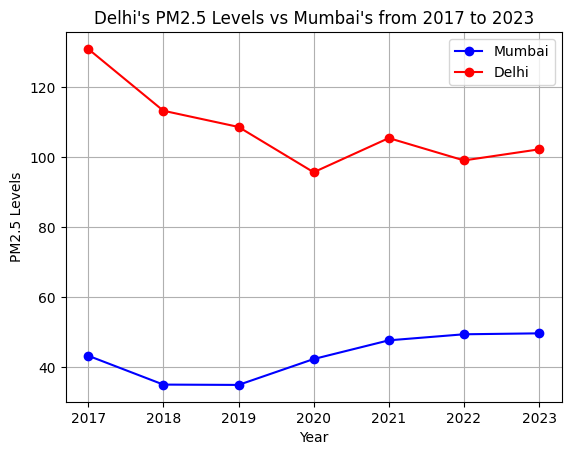

In [ ]:
mumbai_data = data_copy1_filtered[data_copy1_filtered['city'] == 'Mumbai'].copy()
mumbai_data_pm = mumbai_data.groupby(mumbai_data['Timestamp'].dt.year)['PM2.5'].mean()
delhi_data_pm = Delhi_data.groupby(Delhi_data['Timestamp'].dt.year)['PM2.5'].mean()
print("The standard deviation of PM2.5 values in Delhi from year 2017 to 2023 is ", Delhi_data['PM2.5'].std())
print("The standard deviation of PM2.5 values in Mumbai from year 2017 to 2023 is ", mumbai_data['PM2.5'].std())
print("So it is pretty clear that Delhi has more fluctuations than Mumbai.")
plt.plot(mumbai_data_pm.index, mumbai_data_pm, marker='o', linestyle='-', color='blue', label="Mumbai")
plt.plot(delhi_data_pm.index, delhi_data_pm, marker='o', linestyle='-', color='red', label="Delhi")
plt.legend()
plt.xlabel("Year")
plt.ylabel("PM2.5 Levels")
plt.title("Delhi's PM2.5 Levels vs Mumbai's from 2017 to 2023")
plt.grid(True)
plt.show()


# Population-Based

1.Which state in India has the highest number of monitoring stations relative to its population?

In [ ]:
state=pd.read_csv('State_data.csv')
Population_based1 = aqi.groupby('state')['station'].nunique().reset_index(name='total_stations')
state_population = state[['State', 'Population']]
Population_based1 = pd.merge(Population_based1, state_population, right_on='State',left_on='state')
Population_based1['stations_per_capita'] = Population_based1['total_stations'] / Population_based1['Population']
print(Population_based1.loc[Population_based1['stations_per_capita'].idxmax(), 'state']
,"has the highest number of monitoring stations relative to its population")

Chandigarh has the highest number of monitoring stations relative to its population


2.Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

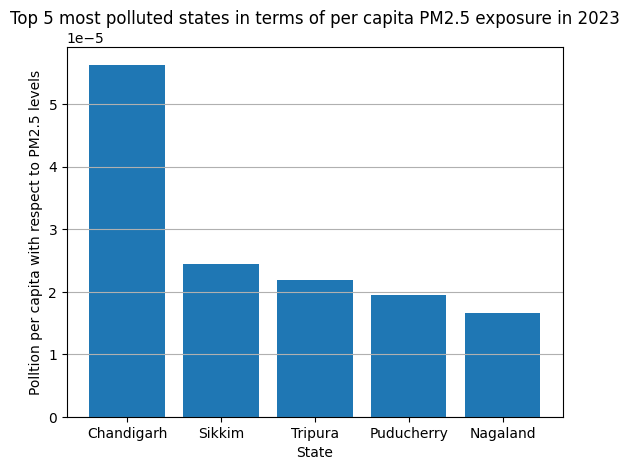

In [ ]:
Population_base2=aqi.loc[aqi['Timestamp'].dt.year==2023]
Population_base2=Population_base2.groupby('state')['PM2.5'].mean().reset_index()
Population_base2.rename(columns={'state':'State'},inplace=True)
Population_base2=pd.merge(Population_base2,state,on='State',how='left')
Population_base2['Pollution_per_capita']=Population_base2['PM2.5']/Population_base2['Population']
Population_base2=Population_base2.sort_values(by='Pollution_per_capita',ascending=False)
plt.bar(Population_base2['State'].head(),Population_base2['Pollution_per_capita'].head())
plt.xlabel('State')
plt.ylabel('Polltion per capita with respect to PM2.5 levels')
plt.title('Top 5 most polluted states in terms of per capita PM2.5 exposure in 2023')
plt.grid(True,axis='y')
plt.show()

Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?

X-axis: Population density (people per square kilometer).

Y-axis: Average PM2.5 concentration.

Use a scatter plot to show the relationship, where each point represents a state.

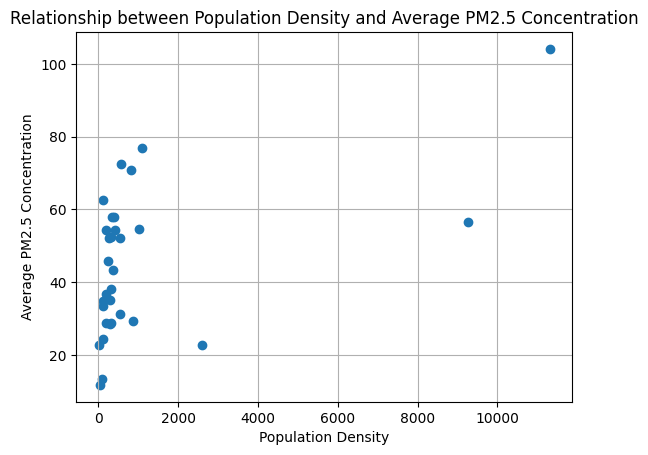

 While some highly populated areas show high pollution levels, many low-density areas also have significant pollution, indicating other contributing factors like industrial activity, geography, or weather conditions also affect the pollution level.


In [ ]:
Population_based3=aqi.groupby('state')['PM2.5'].mean()
Population_based3=pd.DataFrame(Population_based3)
Population_based3=Population_based3.reset_index()
Population_based3=pd.merge(Population_based3,state,left_on='state',right_on='State')
Population_based3['Population Density']=Population_based3['Population']/Population_based3['Area (km2)']
plt.scatter(Population_based3['Population Density'],Population_based3['PM2.5'])
plt.xlabel('Population Density')
plt.ylabel('Average PM2.5 Concentration')
plt.title('Relationship between Population Density and Average PM2.5 Concentration')
plt.grid()
plt.show()
print(" While some highly populated areas show high pollution levels, many low-density areas also have significant pollution, indicating other contributing factors like industrial activity, geography, or weather conditions also affect the pollution level.")

# Area Based [3 Marks]
1.Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
X-axis: States.
Y-axis: PM2.5 concentration per square kilometer.
Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.


The state with the highest PM2.5 concentration per square kilometer is Chandigarh


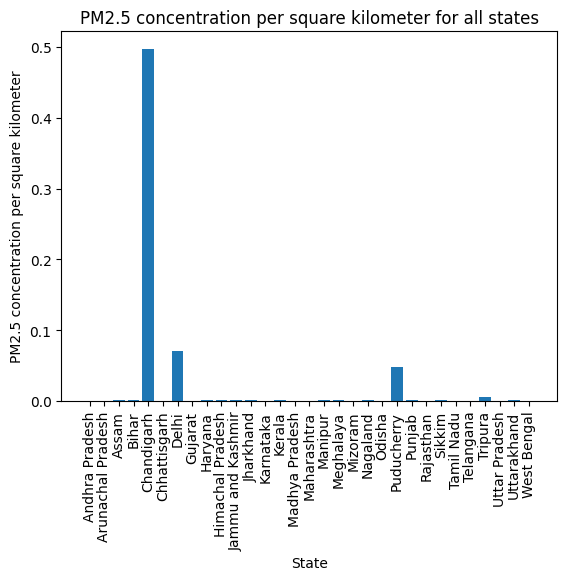

In [ ]:
State_data.rename(columns={'State': 'state'}, inplace=True)
State_data.head()

merged_data = pd.merge(data, State_data, on='state')

state_pm_avg = merged_data.groupby('state')['PM2.5'].mean()

# print(state_pm_avg)

av_pm = state_pm_avg / merged_data.groupby('state')['Area (km2)'].first()
# print(av_pm)

av_pm_max = av_pm.idxmax()
print("The state with the highest PM2.5 concentration per square kilometer is", av_pm_max)

plt.bar(av_pm.index, av_pm)
plt.xlabel('State')
plt.ylabel('PM2.5 concentration per square kilometer')
plt.title('PM2.5 concentration per square kilometer for all states')
plt.xticks(rotation=90)
plt.show()





2.Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.


The state with the highest density of monitoring stations is: Delhi


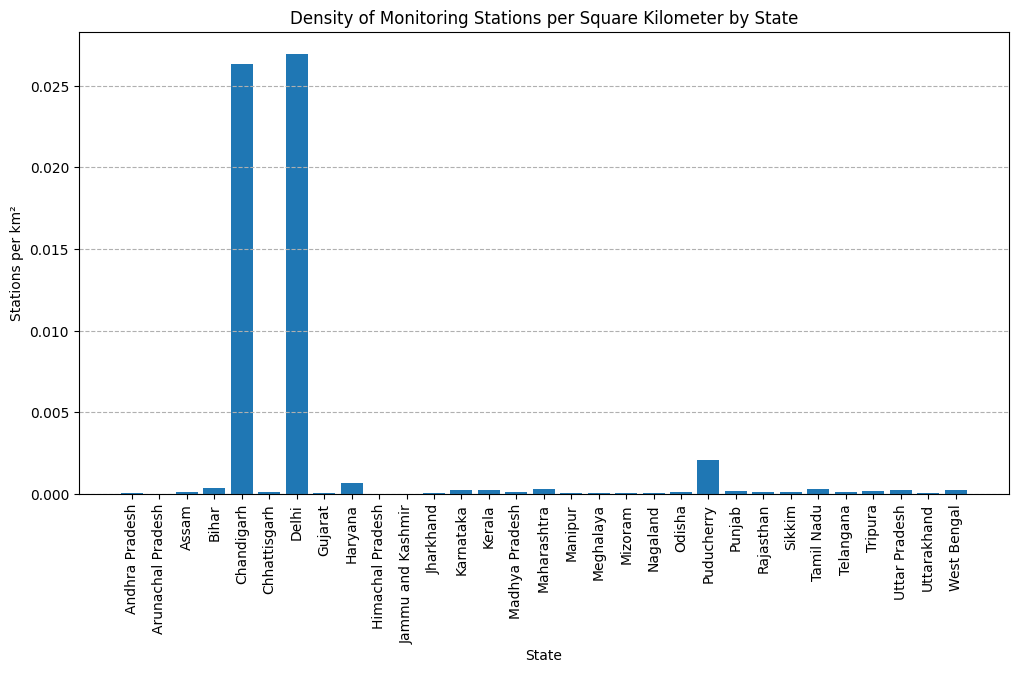

In [ ]:
data_stations = data.groupby('state')['station'].nunique().reset_index()

stations_merged = pd.merge(data_stations, State_data, on='state')

stations_merged['stations_per_sq_km'] = stations_merged['station'] / stations_merged['Area (km2)']

max_stations_state = stations_merged.loc[stations_merged['stations_per_sq_km'].idxmax(), 'state']
print("The state with the highest density of monitoring stations is:", max_stations_state)

plt.figure(figsize=(12, 6))
plt.bar(stations_merged['state'], stations_merged['stations_per_sq_km'])

plt.title('Density of Monitoring Stations per Square Kilometer by State')
plt.xlabel('State')
plt.ylabel('Stations per km²')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')
plt.show()


3.Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.


In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data_2021 = data[data['Timestamp'].dt.year == 2021]

merged_data_2021 = pd.merge(data_2021, State_data, on='state')

data_2021_mh = data_2021[data_2021['state'] == 'Maharashtra']
data_2021_mp = data_2021[data_2021['state'] == 'Madhya Pradesh']

av_mh = data_2021_mh['PM2.5'].mean()
av_mp = data_2021_mp['PM2.5'].mean()

print("The average PM2.5 value for Maharashtra is", av_mh)
print("The average PM2.5 value for Madhya Pradesh is", av_mp)
print()

state_population = State_data.set_index('state')['Population']
av_pop_pm_mh = av_mh / state_population['Maharashtra']
av_pop_pm_mp = av_mp / state_population['Madhya Pradesh']

# print("The average PM2.5 value per capita for Maharashtra is", av_pop_pm_mh)
# print("The average PM2.5 value per capita for Madhya Pradesh is", av_pop_pm_mp)
av_pop_pm_mh_million = (av_mh / state_population['Maharashtra']) * 1e6
av_pop_pm_mp_million = (av_mp / state_population['Madhya Pradesh']) * 1e6

print("The average PM2.5 value per million people for Maharashtra is", av_pop_pm_mh_million)
print("The average PM2.5 value per million people for Madhya Pradesh is", av_pop_pm_mp_million)

print("As we can see, despite both states having similar pm2.5 value and similar area the difference in pm values per capita is quite significant.")
print(f"Per capita PM2.5 value of Madhya Pradesh is {round((((av_pop_pm_mp_million - av_pop_pm_mh_million) / av_pop_pm_mh_million) * 100),2)}% more than Maharashtra.")


The average PM2.5 value for Maharashtra is 46.44004417107665
The average PM2.5 value for Madhya Pradesh is 47.095951831498965

The average PM2.5 value per million people for Maharashtra is 0.41326202284178765
The average PM2.5 value per million people for Madhya Pradesh is 0.6484651119877642
As we can see, despite both states having similar pm2.5 value and similar area the difference in pm values per capita is quite significant.
Per capita PM2.5 value of Madhya Pradesh is 56.91% more than Maharashtra.


# Funding Based

1.Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

In [ ]:
funds=pd.read_csv('NCAP_Funding.csv')
Funding_base1 = funds.groupby('State')['Amount released during FY 2021-22'].apply(lambda x: pd.to_numeric(x, errors='coerce').sum()).reset_index()
Funding_base1.rename(columns={'State': 'state'}, inplace=True)
Funding_base1_nofunds=pd.merge(pd.DataFrame(aqi.loc[aqi['Timestamp'].dt.year==2021].groupby('state')['PM2.5'].mean()).reset_index(),Funding_base1.loc[Funding_base1['Amount released during FY 2021-22']==0],on='state',how='inner')
Funding_base1_funds=pd.merge(pd.DataFrame(aqi.loc[aqi['Timestamp'].dt.year==2021].groupby('state')['PM2.5'].mean()).reset_index(),Funding_base1.loc[Funding_base1['Amount released during FY 2021-22']>0],on='state',how='inner')
print("Average PM2.5 levels between states that received NCAP funding in 2021",Funding_base1_funds['PM2.5'].mean())
print("Average PM2.5 levels between states that did not receive NCAP funding in 2021",Funding_base1_nofunds['PM2.5'].mean())

Average PM2.5 levels between states that received NCAP funding in 2021 52.62011130212364
Average PM2.5 levels between states that did not receive NCAP funding in 2021 43.87642878615332


2.Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

<ipython-input-31-45c7cb8017dc>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  2021: assam_funding_df["Amount released during FY 2021-22"].replace("-", 0).astype(float).sum(),
<ipython-input-31-45c7cb8017dc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assam_pm25_df["Timestamp"] = pd.to_datetime(assam_pm25_df["Timestamp"], errors='coerce')
<ipython-input-31-45c7cb8017dc>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

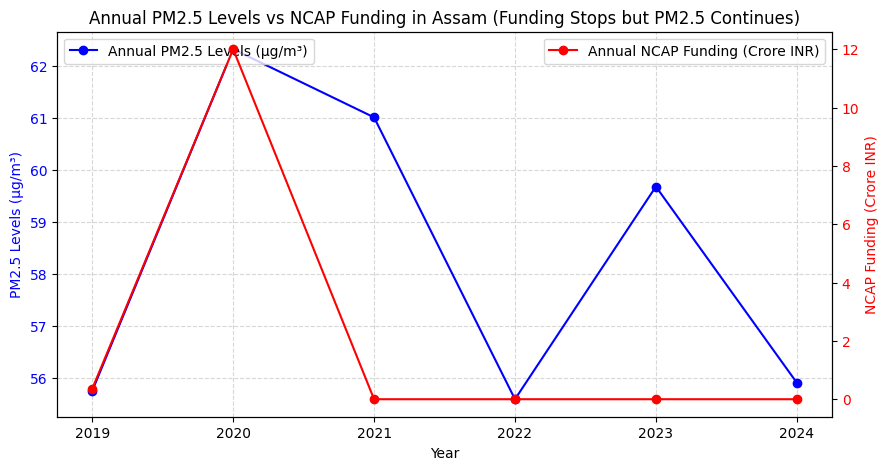

In [31]:
funding_df = pd.read_csv("NCAP_Funding.csv")
data_df = pd.read_csv("Data (2).csv")

assam_funding_df = funding_df[funding_df["State"] == "Assam"]

assam_funding = {
    2019: assam_funding_df["Amount released during FY 2019-20"].replace("-", 0).astype(float).sum(),
    2020: assam_funding_df["Amount released during FY 2020-21"].replace("-", 0).astype(float).sum(),
    2021: assam_funding_df["Amount released during FY 2021-22"].replace("-", 0).astype(float).sum(),
}

assam_pm25_df = data_df[data_df["state"] == "Assam"]

assam_pm25_df["Timestamp"] = pd.to_datetime(assam_pm25_df["Timestamp"], errors='coerce')
assam_pm25_df["Year"] = assam_pm25_df["Timestamp"].dt.year

annual_pm25_trend = assam_pm25_df.groupby("Year")["PM2.5"].mean().dropna()

funding_df_final = pd.DataFrame(list(assam_funding.items()), columns=["Year", "Funding"])
funding_df_final.set_index("Year", inplace=True)

last_funding_year = max(assam_funding.keys())
last_pm25_year = int(annual_pm25_trend.index.max())

for year in range(last_funding_year + 1, last_pm25_year + 1):
    funding_df_final.loc[year] = 0

funding_df_final = funding_df_final.reindex(annual_pm25_trend.index, fill_value=0)
ffig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(annual_pm25_trend.index, annual_pm25_trend.values, 'bo-', label='Annual PM2.5 Levels (µg/m³)')
ax1.set_xlabel('Year')
ax1.set_ylabel('PM2.5 Levels (µg/m³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(funding_df_final.index, funding_df_final["Funding"], 'ro-', label='Annual NCAP Funding (Crore INR)')
ax2.set_ylabel('NCAP Funding (Crore INR)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Annual PM2.5 Levels vs NCAP Funding in Assam (Funding Stops but PM2.5 Continues)')
ax1.grid(True, linestyle='--', alpha=0.5)

plt.show()


After increased funding in the year 2020, the pollution level decreased a bit in the following two years but again increased in 2023. One can debate that it is because of no funding in years after 2020 but we can observe that the pollution level of 2024 is equal to that of 2022 which is minimum in 6 years.

3.Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot

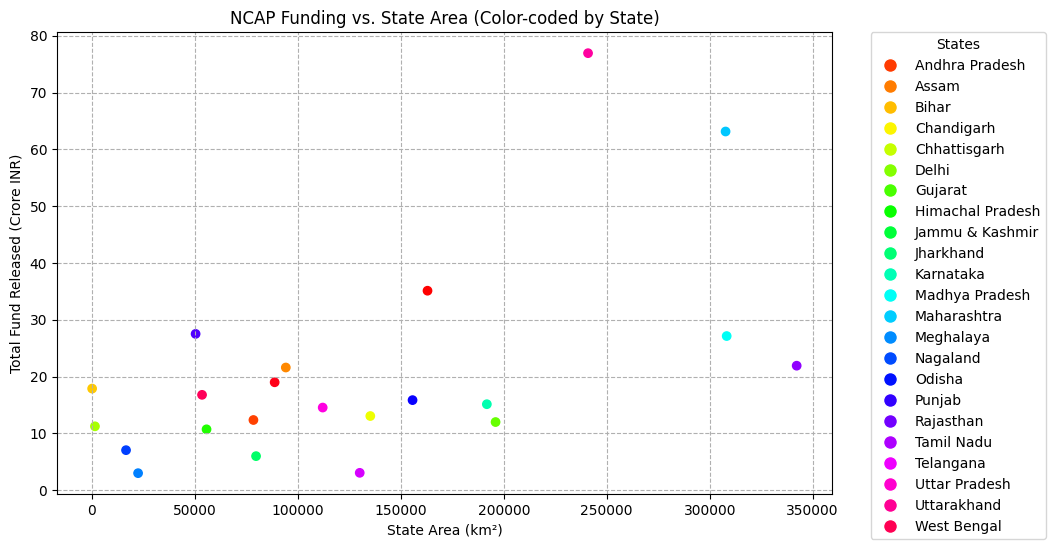

In [30]:
Funding_base3=funds.groupby('State')['Total fund released'].apply(lambda x: pd.to_numeric(x, errors='coerce').sum()).reset_index()
Funding_base3=Funding_base3.reset_index()
Funding_base3=pd.merge(Funding_base3,state,on='State',how='left')
palette = sns.color_palette("hsv", n_colors=len(Funding_base3))
plt.figure(figsize=(10, 6))
plt.scatter(Funding_base3["Area (km2)"], Funding_base3["Total fund released"],
                      c=range(len(Funding_base3)), cmap="hsv", alpha=1)
plt.xlabel("State Area (km²)")
plt.ylabel("Total Fund Released (Crore INR)")
plt.title("NCAP Funding vs. State Area (Color-coded by State)")
plt.grid(True, linestyle='--', alpha=1)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[i], markersize=10)
           for i in range(len(Funding_base3))]

# Create the legend with state names
plt.legend(handles, Funding_base3["State"], title="States", loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()


# Miscellaneous Questions

1.For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [ ]:
Misc1=aqi.copy()
data_2023['Timestamp'] = pd.to_datetime(data_2023['Timestamp'])
data_2023=data_2023[['Timestamp','city','PM2.5']]
Misc1_city=data_2023.groupby('city')['PM2.5'].mean().idxmax()
data_2023=data_2023.loc[data_2023['city']==Misc1_city]
data_2023['Timestamp']=pd.to_datetime(data_2023['Timestamp'])
data_2023=data_2023.loc[data_2023['Timestamp'].dt.year==2023]
data_2023=data_2023.dropna(subset=['PM2.5'])
Misc1_haz=data_2023.loc[data_2023['PM2.5']>=300]
print("For the most polluted city in the year 2023,", Misc1_city,
      "the percentage of days with hazardous PM2.5 levels is,",
      round((len(Misc1_haz) * 100) / len(data_2023), 2), end='')
print("%")


For the most polluted city in the year 2023, Darbhanga the percentage of days with hazardous PM2.5 levels is, 23.08%


<ipython-input-53-18dd9a6a0fdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['Timestamp'] = pd.to_datetime(data_2023['Timestamp'])


2.Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

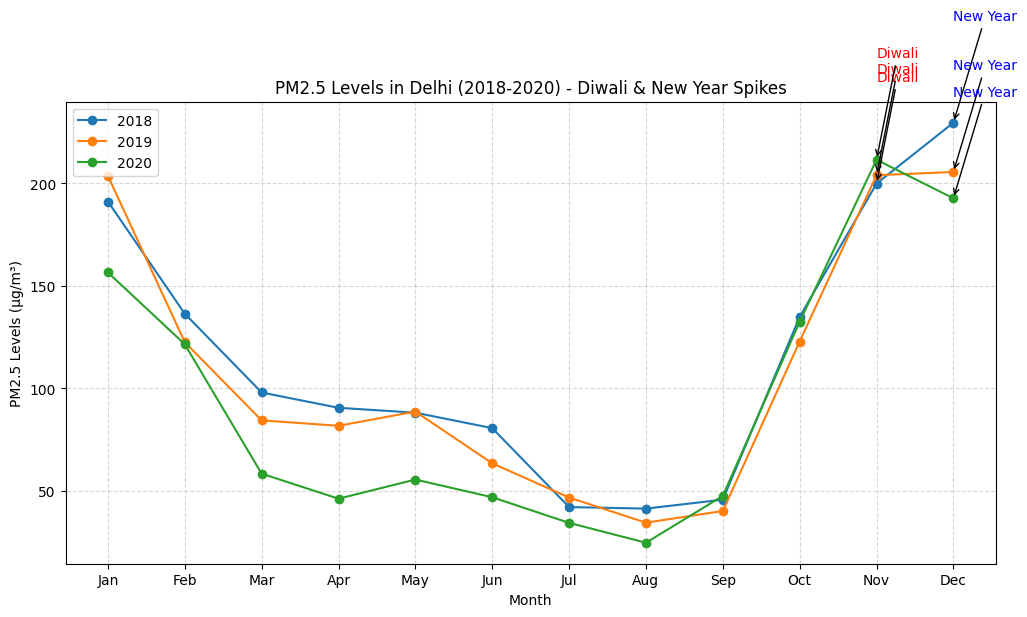

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = aqi.copy()

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

delhi_df = df[df['city'] == 'Delhi'].copy()

delhi_df['Year'] = delhi_df['Timestamp'].dt.year
delhi_df['Month'] = delhi_df['Timestamp'].dt.month

diwali_months = [10, 11]
new_year_months = [12, 1]

monthly_pm25 = delhi_df.groupby(['Year', 'Month'])['PM2.5'].mean().unstack()

plt.figure(figsize=(12,6))
for year in [2018, 2019, 2020]:
    plt.plot(monthly_pm25.columns, monthly_pm25.loc[year], marker='o', label=f"{year}")

for year in [2018, 2019, 2020]:
    diwali_spike = monthly_pm25.loc[year, diwali_months].max()
    new_year_spike = monthly_pm25.loc[year, new_year_months].max()

    diwali_month = monthly_pm25.loc[year, diwali_months].idxmax()
    new_year_month = monthly_pm25.loc[year, new_year_months].idxmax()

    plt.annotate('Diwali', xy=(diwali_month, diwali_spike), xytext=(diwali_month, diwali_spike + 50),
                 arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=10, color='red')

    plt.annotate('New Year', xy=(new_year_month, new_year_spike), xytext=(new_year_month, new_year_spike + 50),
                 arrowprops=dict(facecolor='blue', arrowstyle='->'), fontsize=10, color='blue')

plt.xlabel("Month")
plt.ylabel("PM2.5 Levels (µg/m³)")
plt.title("PM2.5 Levels in Delhi (2018-2020) - Diwali & New Year Spikes")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


YES!, The pollution during festive season (november to january) is at all time high but i doubt that it's solely because of festivals as we have seen above the values during winter are generally manifolds more than that during summer and monsoon. One interesting thing is also that the values have decreased over the years;2018 to 2020.

3.Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.

Andhra Pradesh


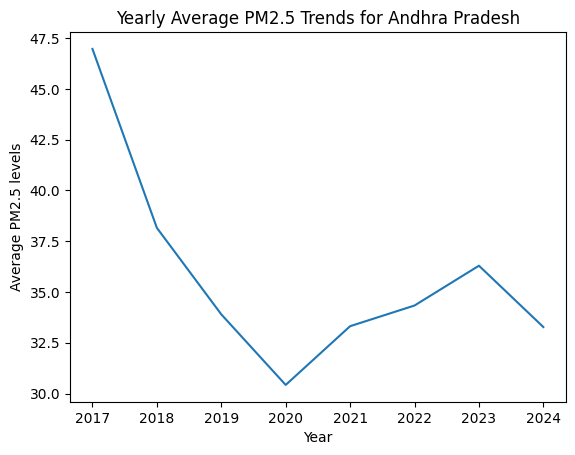

Despite of recieving highest funding in 2020, the average PM2.5 values for Andhra Pradesh has increased but is still in control as compared to 2017 levels.One of the reason for increase can be end of covid and people coming to normal life again.


In [ ]:
Misc3=funds.groupby('State')['Amount released during FY 2020-21'].apply(lambda x: pd.to_numeric(x, errors='coerce').sum()).reset_index()
Misc3_city=Misc3['Amount released during FY 2020-21'].idxmax()
print(Misc3['State'][Misc3_city])
Misc3_plot=pd.DataFrame({
    "2017" : aqi.loc[(aqi['Timestamp'].dt.year==2017) & (aqi['state']==Misc3['State'][Misc3_city])].groupby('state')['PM2.5'].mean(),
    "2018" : aqi.loc[(aqi['Timestamp'].dt.year==2018) & (aqi['state']==Misc3['State'][Misc3_city])].groupby('state')['PM2.5'].mean(),
    "2019" : aqi.loc[(aqi['Timestamp'].dt.year==2019) & (aqi['state']==Misc3['State'][Misc3_city])].groupby('state')['PM2.5'].mean(),
    "2020" : aqi.loc[(aqi['Timestamp'].dt.year==2020) & (aqi['state']==Misc3['State'][Misc3_city])].groupby('state')['PM2.5'].mean(),
    "2021" : aqi.loc[(aqi['Timestamp'].dt.year==2021) & (aqi['state']==Misc3['State'][Misc3_city])].groupby('state')['PM2.5'].mean(),
    "2022" : aqi.loc[(aqi['Timestamp'].dt.year==2022) & (aqi['state']==Misc3['State'][Misc3_city])].groupby('state')['PM2.5'].mean(),
    "2023" : aqi.loc[(aqi['Timestamp'].dt.year==2023) & (aqi['state']==Misc3['State'][Misc3_city])].groupby('state')['PM2.5'].mean(),
    "2024" : aqi.loc[(aqi['Timestamp'].dt.year==2024) & (aqi['state']==Misc3['State'][Misc3_city])].groupby('state')['PM2.5'].mean(),

})
Misc3.fillna(0,inplace=True)
Misc3_plot=Misc3_plot.T.reset_index()
plt.plot(Misc3_plot['index'],Misc3_plot['Andhra Pradesh'])
plt.xlabel("Year")
plt.ylabel("Average PM2.5 levels")
plt.title("Yearly Average PM2.5 Trends for Andhra Pradesh")
plt.show()
print("Despite of recieving highest funding in 2020, the average PM2.5 values for Andhra Pradesh has increased but is still in control as compared to 2017 levels.One of the reason for increase can be end of covid and people coming to normal life again.")

4.Draw the map of India and plot the sensor locations on the map

In [ ]:
import geopandas as gpd
print(gpd.__version__)


1.0.1


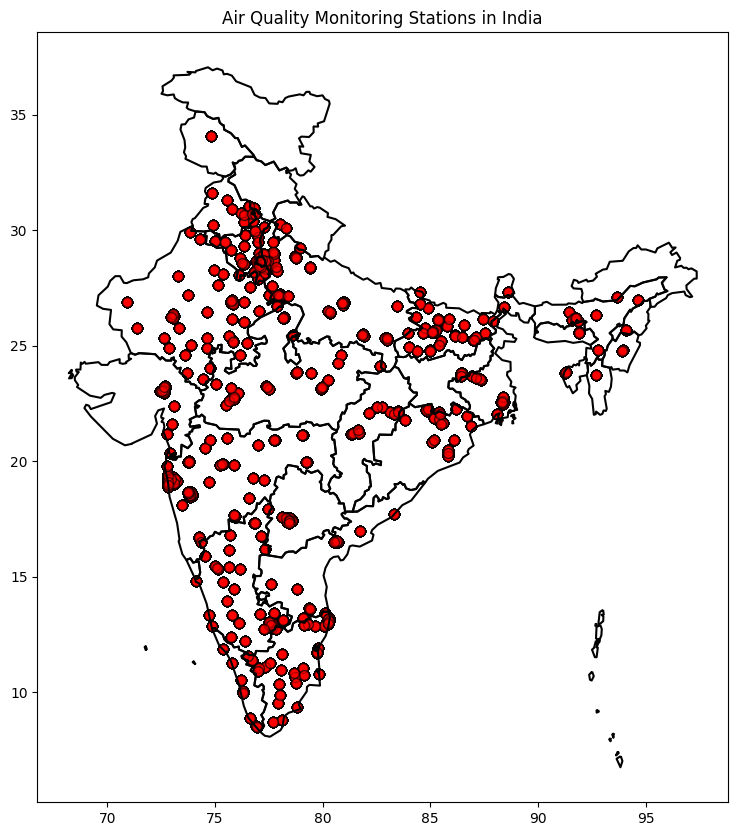

In [ ]:
map = gpd.read_file("/content/india-polygon.shp")
map = map.to_crs("EPSG:4326")
map = map.simplify(0.01)

gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude), crs="EPSG:4326") # Ensure same CRS

fig, ax = plt.subplots(figsize=(10, 10))
map.boundary.plot(ax=ax, color="black")

gdf.plot(ax=ax, markersize=50, color="red", alpha=0.6, edgecolor="black")

ax.set_title("Air Quality Monitoring Stations in India", fontsize=12)

plt.show()

## Tell us something new [1 Mark]
Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers.


Pollution Varies by Location – Some areas have severe pollution while others are cleaner, so policies should be tailored to each region.
Missing Data in Key Areas – Some major cities lack data, possibly hiding pollution hotspots. More monitoring is needed in industrial and traffic-heavy zones.